# Regressão Linear

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

In [8]:
%matplotlib inline
rcParams["figure.figsize"] = 5, 4
sns.set_style("whitegrid")

caminho = 'C:/Users/Rio Photo Eventos/Documents/programacao/Vizualização de Dados com Python/dados/enrollment_forecast.csv'
inscritos = pd.read_csv(caminho)
inscritos.columns = ['year', 'roll', 'unem', 'hgrad', "inc"]

roll : Qtd de inscritos
unem : Taxa de desemprego
hgrad: Qtd de formados ano anterios
inc: Renda per capita da cidade de Albuquerque

Prever quantos inscritos terão ano que vem

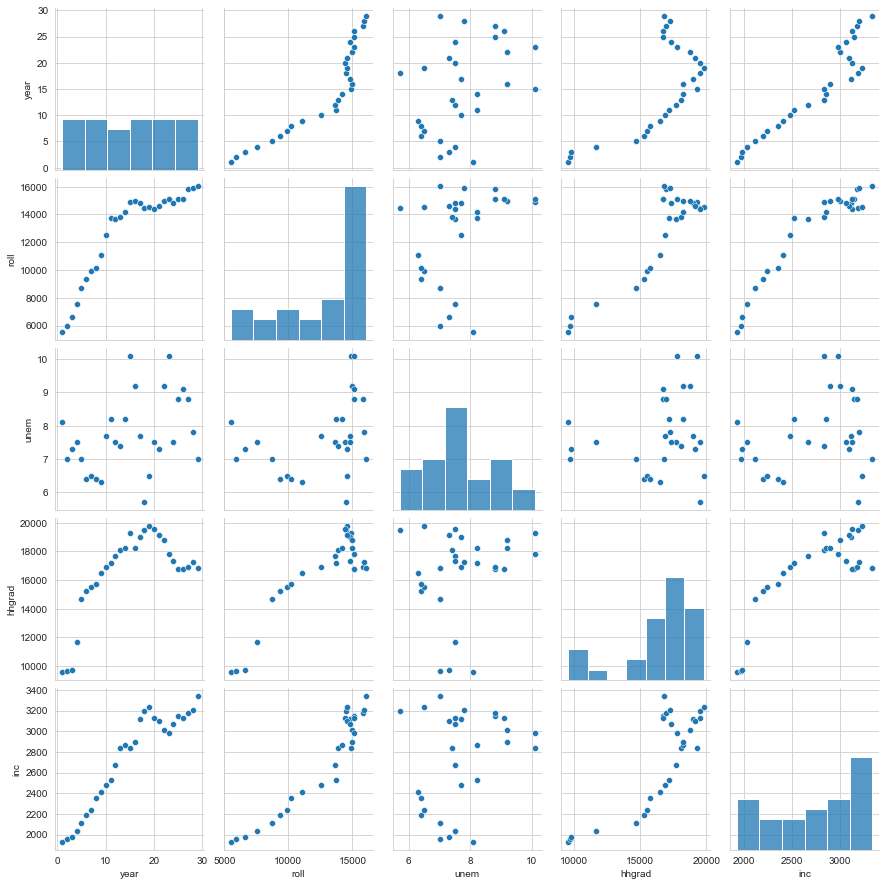

In [5]:
sns.pairplot(inscritos)

In [6]:
print(inscritos.corr())

            year      roll      unem    hhgrad       inc
year    1.000000  0.900934  0.378305  0.670300  0.944287
roll    0.900934  1.000000  0.391344  0.890294  0.949876
unem    0.378305  0.391344  1.000000  0.177376  0.282310
hhgrad  0.670300  0.890294  0.177376  1.000000  0.820089
inc     0.944287  0.949876  0.282310  0.820089  1.000000


In [10]:
inscritos_cols = ['unem', 'hgrad']
inscritos_data = inscritos[inscritos_cols].values

inscritos_target = inscritos['roll'].values

X, y = scale(inscritos_data), inscritos_target

Conferindo valores nulos

In [11]:
em_branco = X == np.NAN
X[em_branco == True]

array([], dtype=float64)

In [12]:
lin_reg = LinearRegression(normalize=True)

lin_reg.fit(X, y)

LinearRegression(normalize=True)

In [13]:
print(lin_reg.score(X, y))

0.8488812666133723


# Regressão Logítica

In [15]:
from scipy.stats import spearmanr
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

caminho = 'C:/Users/Rio Photo Eventos/Documents/programacao/Vizualização de Dados com Python/dados/mtcars.csv'
carros = pd.read_csv(caminho)
carros.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

prever se o carro e automatico ou manual

In [16]:
carros_colunas = ['drat', 'carb']
carros_dados = carros[carros_colunas].values

y = carros['am'].values

### Checando se são categoricas

<AxesSubplot:xlabel='drat', ylabel='carb'>

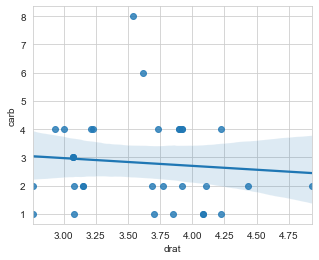

In [17]:
sns.regplot(x='drat', y='carb', data=carros, scatter=True)

### Checando independencias

In [18]:
drat = carros['drat']
carb = carros['carb']

spearman, p = spearmanr(drat, carb)
print(spearman)

-0.1252229399201802


In [19]:
carros.isnull().sum()

car_names    0
mpg          0
cyl          0
disp         0
hp           0
drat         0
wt           0
qsec         0
vs           0
am           0
gear         0
carb         0
dtype: int64

### Conferindo se o target é binario ou ordinal

<AxesSubplot:xlabel='am', ylabel='count'>

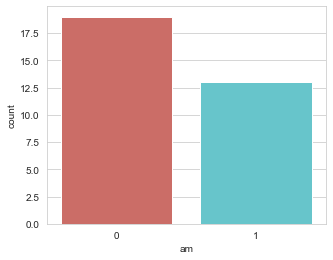

In [20]:
sns.countplot(x="am", data=carros, palette='hls')

In [21]:
carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   car_names  32 non-null     object 
 1   mpg        32 non-null     float64
 2   cyl        32 non-null     int64  
 3   disp       32 non-null     float64
 4   hp         32 non-null     int64  
 5   drat       32 non-null     float64
 6   wt         32 non-null     float64
 7   qsec       32 non-null     float64
 8   vs         32 non-null     int64  
 9   am         32 non-null     int64  
 10  gear       32 non-null     int64  
 11  carb       32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [23]:
X = scale(carros_dados)

In [24]:
reg_log = LogisticRegression().fit(X, y)
print(reg_log.score(X, y))

0.8125


In [25]:
y_predito = reg_log.predict(X)
print(classification_report(y, y_predito))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        19
           1       0.73      0.85      0.79        13

    accuracy                           0.81        32
   macro avg       0.81      0.82      0.81        32
weighted avg       0.82      0.81      0.81        32



# Naive Bayse

In [27]:
import urllib
import sklearn

from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'
raw_data = urllib.request.urlopen(url)
dados = np.loadtxt(raw_data, delimiter=',')
print(dados[0])

[  0.      0.64    0.64    0.      0.32    0.      0.      0.      0.
   0.      0.      0.64    0.      0.      0.      0.32    0.      1.29
   1.93    0.      0.96    0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.778   0.      0.
   3.756  61.    278.      1.   ]


### Predizendo spam

In [28]:
X = dados[:, :48]

y = dados[:, -1]

In [30]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=.33, random_state=17)

In [31]:
GausNb = GaussianNB().fit(X_treino, y_treino)
print(GausNb)

y_predito = GausNb.predict(X_teste)
print(accuracy_score(y_teste, y_predito))


GaussianNB()
0.8130348913759052


In [33]:
MultiNB = MultinomialNB().fit(X_treino, y_treino)
print(MultiNB)

y_predito = MultiNB.predict(X_teste)
print(accuracy_score(y_teste, y_predito))

MultinomialNB()
0.8736010533245556


In [34]:
BernNB = BernoulliNB(binarize=True).fit(X_treino, y_treino)
print(BernNB)

y_predito = BernNB.predict(X_teste)
print(accuracy_score(y_teste, y_predito))

BernoulliNB(binarize=True)
0.8558262014483212


In [35]:
BernNB = BernoulliNB(binarize=.1).fit(X_treino, y_treino)
print(BernNB)

y_predito = BernNB.predict(X_teste)
print(accuracy_score(y_teste, y_predito))

BernoulliNB(binarize=0.1)
0.8953258722843976
